# K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a supervised learning algorithm used for classification and regression tasks. Here's a brief overview of how it works:

* **Training Phase:** During this phase, the algorithm stores all the available data points along with their corresponding classifications.

* **Prediction Phase:** When a new data point needs to be classified, the algorithm identifies the 'K' nearest neighbors from the stored data points. The classification of the new data point is then determined based on the majority vote of these nearest neighbors.  

**KNN** is intuitive and simple to implement, making it a popular choice for many types of predictive modeling tasks.

In this notebook, the customer dataset is loaded, then the data is fitted to build a KNN model, and this KNN model is then used to predict a data point.

In this example, we have data points belonging to Class A and Class B. Our goal is to predict the class of a star-shaped test data point. If we choose a k value of 3 (the 3 nearest data points), the predicted class will be Class B. However, if we choose a k value of 6, the predicted class will be Class A.

This illustrates the importance of selecting an appropriate k value. From this diagram, you can see how the K-Nearest Neighbors algorithm works: it predicts the classification of a test point based on the 'K' nearest neighbors.

Here we first load the required libraries in python.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import os

%matplotlib inline

### Dataset Description

Consider a telecommunications provider that has segmented its customer base according to service usage patterns, categorizing customers into four groups. If demographic data can be used to predict group membership, the company can tailor offers for individual prospective customers. This is a classification problem where a dataset with predefined labels is given, we aim to build a model to predict the class of new or unknown cases.

This example focuses on using demographic data such as region, age, and marital status to predict usage patterns.

The target field, `custcat`, has four possible values corresponding to the four customer groups:
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our goal is to build a classifier to predict the class of unknown cases using the K-nearest neighbors classifer.

### Downloading the dataset

In [2]:
telefile = os.path.join('Storage', 'teleCust.csv')
df = pd.read_csv(telefile)
display(df)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


### Data Visualization and Anylisis
Let’s explore how many of classes are in the dataset

In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

### Feature set
Lets defind feature sets, X:

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

**To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:**

In [5]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
display(X)

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

### Class Labels

In [6]:
y = df['custcat'].values
print(y)

[1 4 3 1 3 3 2 4 3 2 1 3 1 4 1 2 3 3 1 4 2 1 4 1 3 3 4 3 1 2 2 4 3 2 4 2 4
 3 3 3 3 3 1 4 3 2 2 4 1 3 1 2 4 1 1 1 2 1 3 2 3 4 1 4 4 1 3 3 1 1 1 2 1 2
 3 1 3 1 3 4 4 1 4 3 2 1 2 4 4 3 2 1 2 4 1 4 3 2 3 2 4 3 3 2 2 2 1 4 1 2 2
 2 1 2 3 1 3 3 3 1 1 1 1 2 1 2 4 2 2 4 3 1 4 2 3 1 1 3 3 4 4 3 4 2 3 1 4 2
 2 2 1 3 4 4 4 3 1 1 2 3 3 3 1 3 2 2 4 1 1 2 4 1 4 1 2 1 3 4 4 1 4 1 2 2 2
 1 1 2 3 3 1 4 2 3 4 1 1 3 1 4 1 4 2 2 4 1 3 4 3 3 1 1 1 2 2 1 3 4 4 1 3 4
 1 3 1 4 4 1 3 3 3 3 2 1 4 2 4 4 1 4 1 4 3 2 1 3 2 1 1 2 1 4 2 2 4 3 2 1 4
 4 4 1 3 2 1 1 3 3 3 1 3 2 4 1 3 2 2 3 3 1 4 4 3 2 3 3 4 3 3 2 4 3 2 3 4 4
 3 1 4 2 3 3 2 2 1 4 2 3 4 1 1 2 2 4 4 1 3 1 4 1 4 3 2 4 1 3 1 3 4 1 1 1 1
 4 2 1 3 1 1 3 1 4 1 4 3 1 2 3 4 4 4 3 1 3 2 3 2 2 3 3 3 3 4 2 3 1 4 3 1 4
 4 3 2 4 1 1 2 2 4 1 1 2 3 2 2 3 1 4 3 2 1 4 4 4 3 4 3 2 3 3 2 3 2 3 1 3 4
 2 1 2 4 1 2 2 3 2 1 3 2 1 2 1 3 4 2 2 4 1 3 2 1 2 1 2 4 4 1 4 3 4 4 3 4 1
 3 2 3 1 4 3 3 1 1 2 4 1 4 2 3 4 1 4 3 2 3 4 3 1 2 1 2 3 2 1 4 2 4 3 2 1 1
 1 2 1 3 1 1 3 2 3 1 1 1 

### Data Normalization
Data standardization transforms data to have a zero mean and unit variance. This is a good practice, especially for algorithms like K-Nearest Neighbors (KNN), which rely on the distance between data points.

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

# Train Test Split
Test accuracy is the percentage of correct predictions made by the model on data that it has not been trained on. Training and testing on the same dataset usually results in low Testing accuracy due to overfitting.

High Testing accuracy is crucial because the purpose of any model is to make accurate predictions on new, unseen data. One effective way to improve Testing accuracy is by using the Train/Test Split approach.

This method involves splitting the dataset into separate training and testing sets. Meaning no data point appears in both sets.

Here’s how it works:

Split the Dataset: Divide the dataset into a training set and a testing set.
* ***Train the Model:*** Using the training set to train the model.
* ***Test the Model:*** Using the testing set to evaluate the model.


This approach provides a more accurate assessment of out-of-sample accuracy because the testing dataset is not used during training, making it more representative of real-world scenarios.

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Classification

In [9]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

### Model Prediction

In [10]:
y_pred = neigh.predict(X_test)
print(y_pred)

[1 3 1 4 4 3 4 4 2 4 1 4 2 1 3 1 2 4 1 4 3 3 1 4 1 2 1 1 1 1 3 1 4 1 3 2 3
 1 2 3 1 2 1 1 2 1 2 3 4 4 2 1 2 1 4 3 3 3 1 1 1 4 2 3 3 1 1 2 2 1 1 3 4 1
 1 1 4 1 2 2 2 1 2 1 1 2 1 4 1 1 2 2 1 3 1 1 2 2 1 1 1 4 1 3 1 1 3 2 2 2 1
 3 3 4 1 2 1 3 1 1 4 1 2 3 1 1 2 2 1 1 3 1 1 4 2 4 2 1 3 2 4 1 4 1 1 4 4 3
 2 2 1 2 2 3 2 3 3 3 3 2 3 1 1 1 1 4 4 3 3 1 1 3 2 2 2 2 1 4 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 3 3 4 1 2 3 2]


### Model Evaluation

In [11]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.56875
Test set Accuracy:  0.315


### Now lets try another value for K

K = 4 and K = 6

In [12]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.5475
Test set Accuracy:  0.315


In [13]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.51625
Test set Accuracy:  0.315



In K-Nearest Neighbors (KNN), K represents the number of nearest neighbors to consider when making a prediction.

The value of K is a parameter that must be specified by the user. Selecting the optimal value for K is crucial for the performance of the model. Here's how the right value of K can be chosen:


Reserve Data for Testing: Split your dataset into training and testing sets.

1. Initial Modeling with K=1: Start by setting K to 1. Train the model using the training set and calculate the prediction accuracy using the testing set.

2. Increment K: Gradually increase the value of K and repeat the training and testing process.

3. Evaluate Performance: Track the accuracy for each K value and determine which K provides the best accuracy for your model.

4. Calculating Accuracy for Different K Values

### Below accuracy scores of multiple KNN models is calculated using a loop and the results is plotted to visualize which K performs the best.

In [14]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315])

### Plot Results
Finally, plot the results to visualize how accuracy changes with different numbers of neighbors.

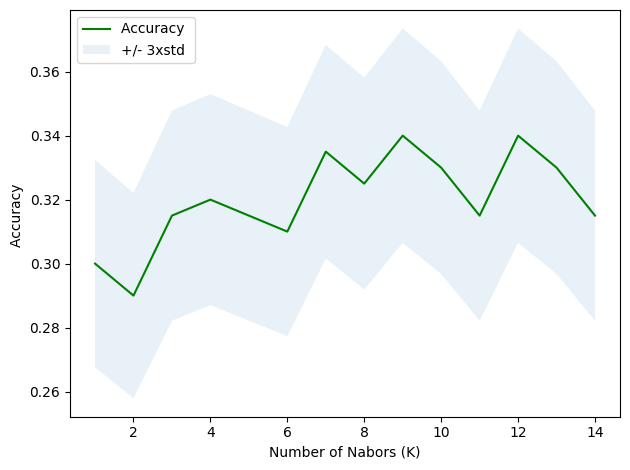

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [16]:
print("The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy 0.34 with k= 9
